# **mohammad amin kiani 4003613052**

# load Reuters Corpus from NLTK:

In [1]:
import nltk
nltk.download('reuters')      # دانلود پیکره Reuters
nltk.download('punkt')        # توکن‌ساز اصلی  punkt_tab
nltk.download('stopwords')    # واژه‌های بی‌معنی

# پاکسازی کامل کش‌های خراب
nltk.download('popular')
nltk.download('all')

# حالا ادامه پیش‌پردازش:

from nltk.corpus import reuters, stopwords
import string
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk

# All docs to one text

In [ ]:
text = ' '.join(reuters.words())
text

'ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPAN RIFT Mounting trade friction between the U . S . And Japan has raised fears among many of Asia \' s exporting nations that the row could inflict far - reaching economic damage , businessmen and officials said . They told Reuter correspondents in Asian capitals a U . S . Move against Japan might boost protectionist sentiment in the U . S . And lead to curbs on American imports of their products . But some exporters said that while the conflict would hurt them in the long - run , in the short - term Tokyo \' s loss might be their gain . The U . S . Has said it will impose 300 mln dlrs of tariffs on imports of Japanese electronics goods on April 17 , in retaliation for Japan \' s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost . Unofficial Japanese estimates put the impact of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of product

1-

[['asian', 'exporters', 'fear', 'damage'], ['.-', 'japan', 'rift', 'mounting', 'trade', 'friction'], [], ['japan', 'raised', 'fears', 'among', 'many', 'asia', 'exporting', 'nations', 'row', 'could', 'inflict', 'far', 'reaching', 'economic', 'damage', 'businessmen', 'officials', 'said'], ['told', 'reuter', 'correspondents', 'asian', 'capitals'], [], ['move', 'japan', 'might', 'boost', 'protectionist', 'sentiment'], [], ['lead', 'curbs', 'american', 'imports', 'products'], ['exporters', 'said', 'conflict', 'would', 'hurt', 'long', 'run', 'short', 'term', 'tokyo', 'loss', 'might', 'gain'], [], [], ['said', 'impose', 'mln', 'dlrs', 'tariffs', 'imports', 'japanese', 'electronics', 'goods', 'april', 'retaliation', 'japan', 'alleged', 'failure', 'stick', 'pact', 'sell', 'semiconductors', 'world', 'markets', 'cost'], ['unofficial', 'japanese', 'estimates', 'put', 'impact', 'tariffs', 'billion', 'dlrs', 'spokesmen', 'major', 'electronics', 'firms', 'said', 'would', 'virtually', 'halt', 'exports

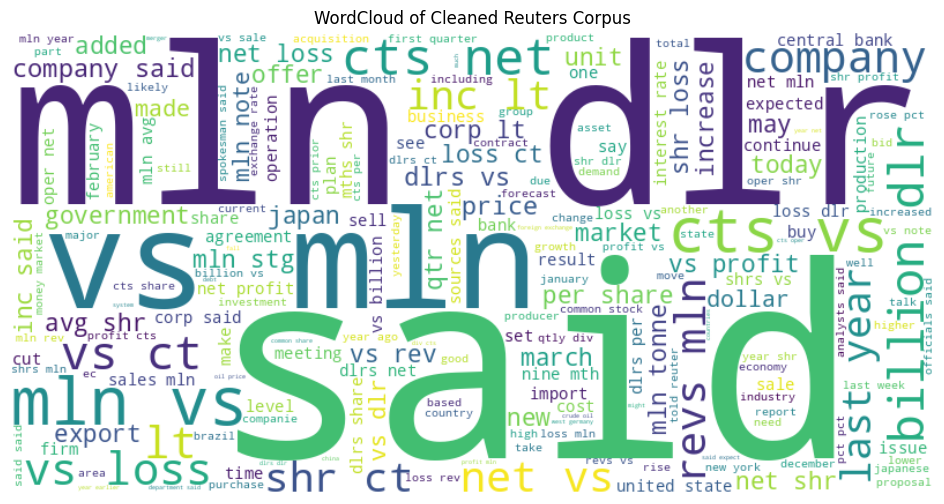

In [ ]:
# حذف فاصله‌های اضافی و تقسیم به جملات
raw_text = ' '.join(reuters.words())
sentences = sent_tokenize(raw_text)
sentences = [s.strip() for s in sentences if s.strip()]

# تبدیل همه حروف به حروف کوچک
sentences = [s.lower() for s in sentences]

# توکن‌سازی هر جمله به کلمات
tokenized_sentences = [word_tokenize(sent) for sent in sentences]

#  حذف اعداد و لینک ها
def remove_numbers_urls(tokens):
    return [w for w in tokens if not re.match(r'http\S+|\d+', w)]

tokenized_sentences = [remove_numbers_urls(sent) for sent in tokenized_sentences]

# حذف علائم نگارشی و کلمات ایست
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def clean_tokens(tokens):
    return [w for w in tokens if w not in punct and w not in stop_words and len(w) > 1]

cleaned_sentences = [clean_tokens(sent) for sent in tokenized_sentences]

print(cleaned_sentences[:50])

# رسم ابر کلمات
all_words = ' '.join([' '.join(sent) for sent in cleaned_sentences])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Cleaned Reuters Corpus")
plt.show()

2-

In [ ]:
# جمع‌آوری متن کامل
text = ' '.join(reuters.words())

# توکن‌سازی + کوچک‌سازی
tokens = word_tokenize(text.lower())

# حذف علائم نگارشی
tokens = [t for t in tokens if t not in string.punctuation]

# حذف stopwords انگلیسی
stop_words = set(stopwords.words('english'))
tokens = [t for t in tokens if t not in stop_words]

# حذف نویزهای عددی و تک‌حرفی
tokens = [t for t in tokens if t.isalpha() and len(t) > 1]

# نمایش نمونه
print(tokens[:50])

['asian', 'exporters', 'fear', 'damage', 'japan', 'rift', 'mounting', 'trade', 'friction', 'japan', 'raised', 'fears', 'among', 'many', 'asia', 'exporting', 'nations', 'row', 'could', 'inflict', 'far', 'reaching', 'economic', 'damage', 'businessmen', 'officials', 'said', 'told', 'reuter', 'correspondents', 'asian', 'capitals', 'move', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'lead', 'curbs', 'american', 'imports', 'products', 'exporters', 'said', 'conflict', 'would', 'hurt', 'long', 'run']


# create N-gram

In [ ]:
from collections import defaultdict, Counter
from nltk.util import ngrams

# تبدیل لیست جمله‌ها به یک لیست بلند از کلمات:
flattened_tokens = [word for sentence in cleaned_sentences for word in sentence]
flattened_tokens

# تولید همه‌ی trigrams (n=3)
trigrams = list(ngrams(flattened_tokens, 3))
trigrams

# ساخت مدل: احتمال وقوع کلمه سوم با توجه به دو کلمه قبلی
model = defaultdict(Counter)
for w1, w2, w3 in trigrams:
    model[(w1, w2)][w3] += 1

model

defaultdict(collections.Counter,
            {('asian', 'exporters'): Counter({'fear': 1}),
             ('exporters',
              'fear'): Counter({'damage': 1, 'china': 1, 'strong': 1}),
             ('fear', 'damage'): Counter({'.-': 1}),
             ('damage', '.-'): Counter({'japan': 1}),
             ('.-',
              'japan'): Counter({'rift': 1,
                      'trade': 11,
                      'agreement': 1,
                      'pact': 4,
                      'economic': 1,
                      'micro': 1,
                      'microchip': 1,
                      'semiconductor': 2}),
             ('japan', 'rift'): Counter({'mounting': 1}),
             ('rift', 'mounting'): Counter({'trade': 1}),
             ('mounting',
              'trade'): Counter({'friction': 2, 'tension': 1, 'deficit': 1}),
             ('trade',
              'friction'): Counter({'japan': 1,
                      'seoul': 1,
                      'diplomacy': 1,
                

In [ ]:
print(model[("new", "york")].most_common(5))

[('investor', 24), ('stock', 22), ('said', 21), ('times', 18), ('investment', 15)]


In [ ]:
from nltk import ngrams
from collections import defaultdict, Counter

trigrams = list(ngrams(tokens, 3))
model2 = defaultdict(Counter)

for w1, w2, w3 in trigrams:
    model2[(w1, w2)][w3] += 1


In [ ]:
print(model2[("new", "york")].most_common(5))

[('investor', 24), ('stock', 22), ('said', 21), ('times', 18), ('investment', 15)]


# Generate Text

##### رندوم :

In [ ]:
import random

def generate_text(model, start=None, length=50, min_options=2):
    # اگر شروع داده نشده یا مناسب نبود، خودمان یک دوتایی خوب انتخاب کنیم
    if (not start) or (start not in model) or (len(model[start]) < min_options):
        # فیلتر: فقط دوتایی‌هایی که ادامه‌ی خوبی دارن
        viable_starts = [key for key in model if len(model[key]) >= min_options]
        if not viable_starts:
            return "هیچ دوتایی مناسبی برای تولید متن یافت نشد!"
        start = random.choice(viable_starts)
        print(f"شروع با دوتایی جایگزین: {start}")

    w1, w2 = start
    output = [w1, w2]

    for _ in range(length):
        next_words = model.get((w1, w2))
        if not next_words:
            break
        w3 = random.choices(
            population=list(next_words.keys()),
            weights=list(next_words.values())
        )[0]
        output.append(w3)
        w1, w2 = w2, w3

    return ' '.join(output)

# print(generate_text(model, start=("the", "market")))

In [ ]:
print(generate_text(model, start=("the", "market")))

شروع با دوتایی جایگزین: ('investor', 'robert')
investor robert toussie told securities exchange commission raised stake buckeye partners limited partnership greenwich conn `` europeans especially much indigenous oil gas assets coastal used transamerica bankruptcy proceedings stemming hundreds dioxin related claims said subsidiaries except independent petrochemical corp complete reorganization charter co qtr oper shr cts vs profit cts vs cts


In [ ]:
print(generate_text(model, start=("new", "york")))

new york tax free company also said new printing technologies make new offer chicago based company strong defenses would easily top mln stg vs mln avg shrs vs year shr cts vs cts oper net mln vs year ended january dlrs compared year earlier deficit billion stg many market attempt establish hold


In [ ]:
import random

def generate_text(model, start=("the", "market"), length=50):
    w1, w2 = start
    output = [w1, w2]

    for _ in range(length):
        next_words = model.get((w1, w2), None)
        if not next_words:
            break  # اگر دنباله‌ای نباشد، متوقف شود

        # انتخاب تصادفی کلمه بعدی بر اساس وزن تکرارها
        w3 = random.choices(
            population=list(next_words.keys()),
            weights=list(next_words.values())
        )[0]

        output.append(w3)
        w1, w2 = w2, w3  # به‌روزرسانی دوتایی برای مرحله بعد

    # print(output)

    return ' '.join(output)

# شروع متن با یک دوتایی پرتکرار مثل
print(generate_text(model, start=("interest", "rates"), length=50))


interest rates tuesday bundesbank wanted set marker stock market sources say concern anticipated fall dutch competitiveness year background average pct official april industrial output growth clearly slowing since beginning bank syndications find procedures processes whereby could operate full capacity company spokesman said yesterday niedermeyer told house commons energy committee hodel said said


In [ ]:
import random

def generate_text(model, start, length=50):
    w1, w2 = start
    output = [w1, w2]
    for _ in range(length):
        next_words = model[(w1, w2)]
        if not next_words:
            break
        w3 = random.choices(list(next_words.keys()), weights=next_words.values())[0]
        output.append(w3)
        w1, w2 = w2, w3

    # print(output)
    return ' '.join(output)

print(generate_text(model2, ("interest", "rates")))


interest rates help dollar economists agreed even auctions generate enough impetus major move come overseas markets run based last week balance comprised tonnes crude sunflowerseed oil import tax australian reserve bank said bank japan intervened tokyo market encourage shift trading hong kong fell pct jan gain consumer credit demand likely remain key


##### انتخاب حریصانه :

In [ ]:
from nltk.util import ngrams
from collections import defaultdict, Counter

# لیست کامل کلمات
tokens = [word for sent in cleaned_sentences for word in sent]
vocab = set(tokens)
V = len(vocab)

# unigram
unigrams = Counter(tokens)

# bigram
bigrams = list(ngrams(tokens, 2))
bigram_model = defaultdict(Counter)
for w1, w2 in bigrams:
    bigram_model[w1][w2] += 1

# trigram
trigrams = list(ngrams(tokens, 3))
trigram_model = defaultdict(Counter)
for w1, w2, w3 in trigrams:
    trigram_model[(w1, w2)][w3] += 1


def generate_text_smooth(start=("the", "market"), length=50):
    w1, w2 = start
    output = [w1, w2]

    for _ in range(length):
        next_word = None

        # حالت اول: trigram در مدل هست
        if (w1, w2) in trigram_model:
            candidates = trigram_model[(w1, w2)]
            denom = sum(candidates.values()) + V  # Add-1 smoothing
            next_word = max(vocab, key=lambda w: (candidates[w] + 1) / denom)

        # حالت دوم: bigram در دسترس ولی trigram نه
        elif w2 in bigram_model:
            candidates = bigram_model[w2]
            denom = sum(candidates.values()) + V
            next_word = max(vocab, key=lambda w: (candidates[w] + 1) / denom)

        # حالت سوم: fallback به unigram
        else:
            denom = sum(unigrams.values()) + V
            next_word = max(vocab, key=lambda w: (unigrams[w] + 1) / denom)

        output.append(next_word)
        w1, w2 = w2, next_word

    return ' '.join(output)

print(generate_text_smooth(start=("the", "market"), length=60))

the market '' said `` think going see billion dlr trade deficit billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs


چون در هر مرحله فقط بیشترین احتمال رو انتخاب می‌کنیم، تو یه لوپ بی‌پایان گیر می‌افته.

In [ ]:
print(generate_text_smooth(start=("new", "york"), length=60))

new york investor asher edelman dominion group last year billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion dlrs billion


In [ ]:
from nltk.util import ngrams
from collections import defaultdict, Counter

# لیست کامل کلمات
tokens = [word for sent in cleaned_sentences for word in sent]
vocab = set(tokens)
V = len(vocab)

# unigram
unigrams = Counter(tokens)

# bigram
bigrams = list(ngrams(tokens, 2))
bigram_model = defaultdict(Counter)
for w1, w2 in bigrams:
    bigram_model[w1][w2] += 1

# trigram
trigrams = list(ngrams(tokens, 3))
trigram_model = defaultdict(Counter)
for w1, w2, w3 in trigrams:
    trigram_model[(w1, w2)][w3] += 1


import random

def sample_top_k(candidates, k=3):
    # گرفتن k تا کلمه با بیشترین احتمال
    top_k = sorted(candidates.items(), key=lambda x: x[1], reverse=True)[:k]
    words, weights = zip(*top_k)
    return random.choices(words, weights=weights)[0]


def generate_text_smooth_fixed(start=("the", "market"), length=50, top_k=3, max_repeat=3):
    w1, w2 = start
    output = [w1, w2]
    repeat_count = 0

    for _ in range(length):
        if (w1, w2) in trigram_model:
            candidates = trigram_model[(w1, w2)]
        elif w2 in bigram_model:
            candidates = bigram_model[w2]
        else:
            candidates = unigrams

        # Smoothing
        smoothed_candidates = {w: (candidates[w] + 1) for w in vocab}

        # انتخاب هوشمند (top-k sampling)
        w3 = sample_top_k(smoothed_candidates, k=top_k)

        # جلوگیری از تکرار پشت‌سر‌هم
        if len(output) >= 2 and w3 == output[-1] == output[-2]:
            repeat_count += 1
            if repeat_count >= max_repeat:
                alt_candidates = [w for w in vocab if w != w3]
                w3 = random.choice(alt_candidates)
                repeat_count = 0
        else:
            repeat_count = 0

        output.append(w3)
        w1, w2 = w2, w3

    return ' '.join(output)


print(generate_text_smooth_fixed(start=("the", "market"), length=60))

the market conditions improved later perkins division divested pending divested process machinery division six mln dlrs cts share vs dlrs net vs revs vs note current qtr includes tax credits dlrs quarter dlrs nine cts net loss vs loss cts vs cts net loss vs profit revs mln vs mln avg shrs vs year shr loss dlrs vs cts net vs revs


حتی با تاپ کا سمپل و جلوگیری از تکرار متوالی، اگر دایره واژگان محتمل در هر مرحله خیلی محدود باشه، تولید متن می‌تونه وارد یک چرخه معنایی محدود بشه.



In [ ]:
print(generate_text_smooth_fixed(start=("new", "york"), length=60))

new york investor asher edelman dominion textiles perkins family perkins family restaurants divested pending sale might divested pending perkins family perkins division company spokesman would say whether would rise pct pct days pct pct effective immediately gulf perkins family restaurants lp perkins division divested pending divested sperry operations income effect nonrecurring gains divested pending sale might dlrs divested sperry operations income taxes


In [ ]:
def generate_text_advanced(
    start=("the", "market"),
    length=60,
    top_k=5,
    temperature=1.0,
    avoid_repeat_ngrams=True,
    repeat_ngram_size=3
):
    w1, w2 = start
    output = [w1, w2]
    seen_ngrams = set()

    for _ in range(length):
        if (w1, w2) in trigram_model:
            candidates = trigram_model[(w1, w2)]
        elif w2 in bigram_model:
            candidates = bigram_model[w2]
        else:
            candidates = unigrams

        # Add-1 smoothing
        smoothed = {w: (candidates[w] + 1) for w in vocab}

        # Top-k انتخاب
        top = sorted(smoothed.items(), key=lambda x: x[1], reverse=True)[:top_k]
        words, weights = zip(*top)

        # Temperature adjustment
        weights = [w ** (1 / temperature) for w in weights]

        # انتخاب تصادفی نسبت به وزن‌ها
        w3 = random.choices(words, weights=weights)[0]

        # جلوگیری از تکرار n-gram
        if avoid_repeat_ngrams and len(output) >= repeat_ngram_size - 1:
            recent_ngram = tuple(output[-(repeat_ngram_size - 1):] + [w3])
            if recent_ngram in seen_ngrams:
                alt_words = [w for w in vocab if w != w3]
                w3 = random.choice(alt_words)
            else:
                seen_ngrams.add(recent_ngram)

        output.append(w3)
        w1, w2 = w2, w3

    return ' '.join(output)


print(generate_text_advanced(start=("the", "market"), length=60, top_k=5, temperature=0.8))

the market rates could flow equally well '' said another trader adding divested many well mln bpd pct mln tonnes mln last year pct year ago period also outlined perkins family restaurants lp perkins division company spokesman told reuters interview `` think trade war `` mood united states said forces well '' company said company expected net taxable divested pending sale company


# Perplexity

In [ ]:
# import math
# from nltk.util import ngrams

# def calculate_perplexity(test_tokens, n=3):
#     if n == 1:
#         model = unigrams
#     elif n == 2:
#         model = bigram_model
#     else:
#         model = trigram_model

#     N = 0
#     log_prob = 0
#     vocab = set(test_tokens)
#     V = len(vocab)

#     # ساخت ان گرم برای تست
#     test_ngrams = list(ngrams(test_tokens, n))

#     for gram in test_ngrams:
#         context = gram[:-1]
#         word = gram[-1]

#         if n == 1:
#             prob = (unigrams[word] + 1) / (sum(unigrams.values()) + V)
#         elif n == 2:
#             count_context = sum(bigram_model[context[0]].values())
#             prob = (bigram_model[context[0]][word] + 1) / (count_context + V)
#         else:  # trigram
#             count_context = sum(trigram_model[context].values()) if context in trigram_model else 0
#             prob = (trigram_model[context][word] + 1) / (count_context + V)

#         log_prob += math.log(prob)
#         N += 1

#     perplexity = math.exp(-log_prob / N)
#     return perplexity


# def calculate_perplexity_v2(test_tokens, n=3, vocab=None):
#     import math
#     if vocab is None:
#         vocab = set(test_tokens)
#     V = len(vocab)

#     N = 0
#     log_prob = 0
#     test_ngrams = list(ngrams(test_tokens, n))

#     for gram in test_ngrams:
#         context = gram[:-1]
#         word = gram[-1]

#         if n == 1:
#             prob = (unigrams[word] + 1) / (sum(unigrams.values()) + V)
#         elif n == 2:
#             count_context = sum(bigram_model[context[0]].values())
#             prob = (bigram_model[context[0]][word] + 1) / (count_context + V)
#         else:
#             count_context = sum(trigram_model[context].values()) if context in trigram_model else 0
#             prob = (trigram_model[context][word] + 1) / (count_context + V)

#         if prob > 0:
#             log_prob += math.log2(prob)
#             N += 1

#     perplexity = 2 ** (-log_prob / N)
#     return perplexity


def calculate_perplexity(test_tokens, n):
    N = 0
    log_prob = 0

    # حذف کلمات تستی که اصلاً تو واژگان آموزش نبودن
    test_tokens = [t for t in test_tokens if t in vocab]

    test_ngrams = list(ngrams(test_tokens, n))

    for gram in test_ngrams:
        context = gram[:-1]
        word = gram[-1]

        # Unigram
        if n == 1:
            prob = (unigrams[word] + 1) / (sum(unigrams.values()) + V)

        # Bigram
        elif n == 2:
            context_count = sum(bigram_model[context[0]].values())
            prob = (bigram_model[context[0]][word] + 1) / (context_count + V)

        # Trigram
        elif n == 3:
            context_count = sum(trigram_model[context].values()) if context in trigram_model else 0
            prob = (trigram_model[context][word] + 1) / (context_count + V)

        else:
            raise ValueError("n باید بین 1 تا 3 باشد.")

        if prob > 0:
            log_prob += math.log2(prob)
            N += 1

    perplexity = 2 ** (-log_prob / N)
    return perplexity



In [ ]:
from nltk.util import ngrams
from collections import defaultdict, Counter
import math

tokens = flattened_tokens

# تقسیم به ۷۰٪ آموزش و ۳۰٪ تست
split_idx = int(0.7 * len(tokens))
train_tokens = tokens[:split_idx]
test_tokens = tokens[split_idx:]

# واژگان و اندازه
vocab = set(train_tokens)
V = len(vocab)

# Unigram
unigrams = Counter(train_tokens)

# Bigram
bigram_model = defaultdict(Counter)
for w1, w2 in ngrams(train_tokens, 2):
    bigram_model[w1][w2] += 1

# Trigram
trigram_model = defaultdict(Counter)
for w1, w2, w3 in ngrams(train_tokens, 3):
    trigram_model[(w1, w2)][w3] += 1

pp_trigram = calculate_perplexity(test_tokens, n=3)
print(f"Trigram Perplexity: {pp_trigram:.2f}")

Trigram Perplexity: 12690.35


In [ ]:
print("Unigram Perplexity:", calculate_perplexity(test_tokens, 1))
print("Bigram Perplexity:", calculate_perplexity(test_tokens, 2))
print("Trigram Perplexity:", calculate_perplexity(test_tokens, 3))


Unigram Perplexity: 1910.0232381167175
Bigram Perplexity: 4579.788855194653
Trigram Perplexity: 12690.35390781458


In [ ]:

import nltk
# nltk.download('reuters')
# nltk.download('punkt')
# nltk.download('stopwords')

from nltk.corpus import reuters, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.util import ngrams
from collections import defaultdict, Counter
import math

# پیش‌پردازش کامل
raw_text = ' '.join(reuters.words())
sentences = sent_tokenize(raw_text)
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

cleaned_sentences = []
for sentence in sentences:
    tokens = word_tokenize(sentence.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words and t not in punct]
    if tokens:
        cleaned_sentences.append(tokens)

# تبدیل جملات تمیز به لیست توکن
tokens = [word for sent in cleaned_sentences for word in sent]

# تقسیم داده‌ها به train/test
split_idx = int(0.7 * len(tokens))
train_tokens = tokens[:split_idx]
test_tokens = tokens[split_idx:]

# حذف کلمات نادر
word_freq = Counter(train_tokens)
train_tokens = [w for w in train_tokens if word_freq[w] >= 3]
vocab = set(train_tokens)
V = len(vocab)
test_tokens = [w for w in test_tokens if w in vocab]

# ساخت مدل‌های N-Gram
unigrams = Counter(train_tokens)

bigram_model = defaultdict(Counter)
for w1, w2 in ngrams(train_tokens, 2):
    bigram_model[w1][w2] += 1

trigram_model = defaultdict(Counter)
for w1, w2, w3 in ngrams(train_tokens, 3):
    trigram_model[(w1, w2)][w3] += 1

# تابع Perplexity با Backoff و Add-1 Smoothing
def calculate_perplexity_backoff(test_tokens, vocab, V):
    test_ngrams = list(ngrams(test_tokens, 3))
    log_prob = 0
    N = 0

    for w1, w2, w3 in test_ngrams:
        if (w1, w2) in trigram_model and trigram_model[(w1, w2)][w3] > 0:
            count_context = sum(trigram_model[(w1, w2)].values())
            prob = (trigram_model[(w1, w2)][w3] + 1) / (count_context + V)
        elif w2 in bigram_model and bigram_model[w2][w3] > 0:
            count_context = sum(bigram_model[w2].values())
            prob = (bigram_model[w2][w3] + 1) / (count_context + V)
        else:
            prob = (unigrams[w3] + 1) / (sum(unigrams.values()) + V)

        log_prob += math.log2(prob)
        N += 1

    return 2 ** (-log_prob / N)

# اجرای ارزیابی
pp_backoff = calculate_perplexity_backoff(test_tokens, vocab, V)
pp_backoff


2153.511724808428

In [8]:
# ----------------------- مرحله ۰: دانلود منابع -----------------------
# import nltk
# nltk.download('reuters')
# nltk.download('punkt')
# nltk.download('stopwords')

# ----------------------- مرحله ۱: پیش‌پردازش داده -----------------------
from nltk.corpus import reuters, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string, re, math, random
from nltk.util import ngrams
from collections import defaultdict, Counter

# بارگذاری پیکره
raw_text = '\n'.join([reuters.raw(fileid) for fileid in reuters.fileids()])
sentences = sent_tokenize(raw_text)
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

cleaned_sentences = []
for s in sentences:
    tokens = word_tokenize(s.lower())
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words and w not in punct]
    if tokens:
        cleaned_sentences.append(tokens)

# ----------------------- مرحله ۲: آماده‌سازی توکن‌ها -----------------------
tokens = [w for sent in cleaned_sentences for w in sent]
split_idx = int(0.7 * len(tokens))
train_tokens = tokens[:split_idx]
test_tokens = tokens[split_idx:]

# حذف کلمات نادر
word_freq = Counter(train_tokens)
train_tokens = [w for w in train_tokens if word_freq[w] >= 3]
vocab = set(train_tokens)
V = len(vocab)
test_tokens = [w for w in test_tokens if w in vocab]

# ----------------------- مرحله ۳: ساخت مدل‌های ان گرم (آماده) -----------------------
# unigrams = Counter(train_tokens)
# bigram_model = defaultdict(Counter)
# for w1, w2 in ngrams(train_tokens, 2):
#     bigram_model[w1][w2] += 1

# trigram_model = defaultdict(Counter)
# for w1, w2, w3 in ngrams(train_tokens, 3):
#     trigram_model[(w1, w2)][w3] += 1

# ----------------------- مرحله ۳ (ساخت مدل‌های N-Gram دستی) -----------------------

# مدل 1-گرم (Unigram)
unigram_model = defaultdict(int)
for word in train_tokens:
    unigram_model[word] += 1

# مدل 2-گرم (Bigram)
bigram_model = defaultdict(lambda: defaultdict(int))
for i in range(len(train_tokens) - 1):
    w1 = train_tokens[i]
    w2 = train_tokens[i + 1]
    bigram_model[w1][w2] += 1

# مدل 3-گرم (Trigram)
trigram_model = defaultdict(lambda: defaultdict(int))
for i in range(len(train_tokens) - 2):
    w1 = train_tokens[i]
    w2 = train_tokens[i + 1]
    w3 = train_tokens[i + 2]
    trigram_model[(w1, w2)][w3] += 1

# ----------------------- مرحله ۴: تابع تولید متن بهینه -----------------------
def generate_text(model, start=None, length=50, min_options=2, top_k=5, temperature=0.8, max_repeat=3):
    if not start or start not in model or len(model[start]) < min_options:
        viable_starts = [key for key in model if len(model[key]) >= min_options]
        if not viable_starts:
            return "هیچ دوتایی مناسبی برای تولید متن یافت نشد!"
        start = random.choice(viable_starts)
        print(f"شروع با دوتایی جایگزین: {start}")

    w1, w2 = start
    output = [w1, w2]

    for _ in range(length):
        next_words = model.get((w1, w2))
        if not next_words:
            break
        candidates = sorted(next_words.items(), key=lambda x: x[1], reverse=True)[:top_k]
        words, weights = zip(*candidates)
        adjusted_weights = [w ** (1 / temperature) for w in weights]
        w3 = random.choices(words, weights=adjusted_weights)[0]
        if len(output) >= 2 and w3 == output[-1] == output[-2]:
            alt = [w for w in vocab if w != w3]
            if alt:
                w3 = random.choice(alt)
        output.append(w3)
        w1, w2 = w2, w3

    return ' '.join(output)

# ----------------------- مرحله ۵: محاسبه سردرگمی برای هر مدل -----------------------
# def calculate_perplexity(tokens, n, vocab, V):
#     tokens = [w for w in tokens if w in vocab]
#     ngram_tokens = list(ngrams(tokens, n))
#     log_prob = 0
#     N = 0

#     for gram in ngram_tokens:
#         context = gram[:-1]
#         word = gram[-1]

#         if n == 1:
#             prob = (unigram_model[word] + 1) / (sum(unigram_model.values()) + V)
#         elif n == 2:
#             prob = (bigram_model[context[0]][word] + 1) / (sum(bigram_model[context[0]].values()) + V)
#         elif n == 3:
#             prob = (trigram_model[context][word] + 1) / (sum(trigram_model[context].values()) + V if context in trigram_model else V)

#         log_prob += math.log2(prob)
#         N += 1

#     return 2 ** (-log_prob / N)

def calculate_perplexity_manual(tokens, n, vocab, V):
    tokens = [w for w in tokens if w in vocab]
    log_prob = 0
    N = 0

    for i in range(len(tokens) - n + 1):
        if n == 1:
            w = tokens[i]
            count = unigram_model[w]
            prob = (count + 1) / (sum(unigram_model.values()) + V)

        elif n == 2:
            w1, w2 = tokens[i], tokens[i + 1]
            context_count = sum(bigram_model[w1].values())
            count = bigram_model[w1][w2]
            prob = (count + 1) / (context_count + V)

        elif n == 3:
            w1, w2, w3 = tokens[i], tokens[i + 1], tokens[i + 2]
            context_count = sum(trigram_model[(w1, w2)].values())
            count = trigram_model[(w1, w2)][w3]
            prob = (count + 1) / (context_count + V)

        log_prob += math.log2(prob)
        N += 1

    return 2 ** (-log_prob / N)


# ----------------------- مرحله ۶: کراس‌ولیدیشن روی داده آموزش -----------------------
from sklearn.model_selection import KFold
import numpy as np

# def cross_val_perplexity(train_tokens, vocab, V, n):
#     scores = []
#     tokens = np.array(train_tokens)
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)

#     for train_idx, val_idx in kf.split(tokens):
#         fold_train = tokens[train_idx]
#         fold_val = tokens[val_idx]

#         # مدل هر فولد
#         uni = Counter(fold_train)
#         bi = defaultdict(Counter)
#         for w1, w2 in ngrams(fold_train, 2):
#             bi[w1][w2] += 1
#         tri = defaultdict(Counter)
#         for w1, w2, w3 in ngrams(fold_train, 3):
#             tri[(w1, w2)][w3] += 1

#         # perplexity در val
#         val_tokens = [w for w in fold_val if w in vocab]
#         val_ngrams = list(ngrams(val_tokens, n))
#         log_prob, N = 0, 0
#         for gram in val_ngrams:
#             context, word = gram[:-1], gram[-1]
#             if n == 1:
#                 prob = (uni[word] + 1) / (sum(uni.values()) + V)
#             elif n == 2:
#                 prob = (bi[context[0]][word] + 1) / (sum(bi[context[0]].values()) + V)
#             else:
#                 prob = (tri[context][word] + 1) / (sum(tri[context].values()) + V if context in tri else V)
#             log_prob += math.log2(prob)
#             N += 1

#         scores.append(2 ** (-log_prob / N))

#     return np.mean(scores)

def cross_val_perplexity_manual(train_tokens, vocab, V, n):
    from sklearn.model_selection import KFold
    import numpy as np

    scores = []
    tokens = np.array(train_tokens)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, val_idx in kf.split(tokens):
        fold_train = tokens[train_idx]
        fold_val = tokens[val_idx]

        # ساخت مدل دستی
        uni = defaultdict(int)
        bi = defaultdict(lambda: defaultdict(int))
        tri = defaultdict(lambda: defaultdict(int))

        for i in range(len(fold_train)):
            uni[fold_train[i]] += 1
            if i < len(fold_train) - 1:
                bi[fold_train[i]][fold_train[i+1]] += 1
            if i < len(fold_train) - 2:
                tri[(fold_train[i], fold_train[i+1])][fold_train[i+2]] += 1

        # محاسبه perplexity
        log_prob = 0
        N = 0
        val_tokens = [w for w in fold_val if w in vocab]

        for i in range(len(val_tokens) - n + 1):
            if n == 1:
                w = val_tokens[i]
                prob = (uni[w] + 1) / (sum(uni.values()) + V)

            elif n == 2:
                w1, w2 = val_tokens[i], val_tokens[i+1]
                prob = (bi[w1][w2] + 1) / (sum(bi[w1].values()) + V)

            elif n == 3:
                w1, w2, w3 = val_tokens[i], val_tokens[i+1], val_tokens[i+2]
                prob = (tri[(w1, w2)][w3] + 1) / (sum(tri[(w1, w2)].values()) + V if (w1, w2) in tri else V)

            log_prob += math.log2(prob)
            N += 1

        scores.append(2 ** (-log_prob / N))

    return np.mean(scores)


# ----------------------- مرحله ۷: اجرای همه گزارش‌ها -----------------------
print("--- Perplexity on TRAIN data ---")
print("Unigram:", calculate_perplexity_manual(train_tokens, 1, vocab, V))
print("Bigram :", calculate_perplexity_manual(train_tokens, 2, vocab, V))
print("Trigram:", calculate_perplexity_manual(train_tokens, 3, vocab, V))

print("\n--- Perplexity on TEST data ---")
print("Unigram:", calculate_perplexity_manual(test_tokens, 1, vocab, V))
print("Bigram :", calculate_perplexity_manual(test_tokens, 2, vocab, V))
print("Trigram:", calculate_perplexity_manual(test_tokens, 3, vocab, V))

print("\n--- Cross-Validation on TRAIN ---")
print("Unigram CV:", cross_val_perplexity_manual(train_tokens, vocab, V, 1))
print("Bigram CV :", cross_val_perplexity_manual(train_tokens, vocab, V, 2))
print("Trigram CV:", cross_val_perplexity_manual(train_tokens, vocab, V, 3))

# ----------------------- مرحله ۸: تولید متن -----------------------
print("\nGenerated Text:")
print(generate_text(trigram_model, start=("interest", "rates"), length=60))


--- Perplexity on TRAIN data ---
Unigram: 1713.648363557543
Bigram : 1432.2991088926603
Trigram: 3086.6235697029683

--- Perplexity on TEST data ---
Unigram: 1620.220824641123
Bigram : 2155.132258895553
Trigram: 5693.694835524911

--- Cross-Validation on TRAIN ---
Unigram CV: 1750.0161611667718
Bigram CV : 4938.154765040645
Trigram CV: 9860.414948554337

Generated Text:
interest rates however currency dealers said federal reserve board said traders responding questions following press speculation bundesbank abandoned money supply growth said midland bank said statement said statement said results would hurt economy tax cuts increase government regularly uses term changed external economic context would risky dangerous monetary policy would hurt investment volcker says fed sets system repurchases tuesday wednesday borrowings billion


In [9]:
def generate_text_unigram(unigram_model, length=50, temperature=1.0):
    words = list(unigram_model.keys())
    freqs = list(unigram_model.values())

    # تنظیم خلاقیت با temperature
    adjusted = [f ** (1 / temperature) for f in freqs]

    generated = random.choices(words, weights=adjusted, k=length)
    return ' '.join(generated)

def generate_text_bigram(bigram_model, start=None, length=50, top_k=5, temperature=0.8):
    if not start or start not in bigram_model:
        start = random.choice(list(bigram_model.keys()))
        print(f"شروع با جایگزین: {start}")

    output = [start]
    current = start

    for _ in range(length - 1):
        next_words = bigram_model.get(current)
        if not next_words:
            break

        candidates = sorted(next_words.items(), key=lambda x: x[1], reverse=True)[:top_k]
        words, weights = zip(*candidates)
        adjusted_weights = [w ** (1 / temperature) for w in weights]
        next_word = random.choices(words, weights=adjusted_weights)[0]

        output.append(next_word)
        current = next_word

    return ' '.join(output)


# ----------------------- مرحله ۸: تولید متن -----------------------
print("\n--- Generated Text (Unigram) ---")
print(generate_text_unigram(unigram_model, length=60))

print("\n--- Generated Text (Bigram) ---")
print(generate_text_bigram(bigram_model, start="interest", length=60))



--- Generated Text (Unigram) ---
hisham lt pressure laws cotton revs year c volcker asset rd two net japan bank dealers sealy shr said futures gwf expenditures would handled june merely barrels miller effective agreements national said mln loss raised sources though mln drawdown committee charge forecast kuwaiti trade shares jump savings mill march large manager use stabilising february company half mln bidders thwart market

--- Generated Text (Bigram) ---
interest rates pct january mln dlrs cts vs mln tonnes mln vs loss vs loss dlrs vs cts net vs loss mln dlrs cts vs mln dlrs vs loss revs mln stg mln dlrs vs cts vs mln vs loss mln dlrs vs loss mln dlrs net profit mln vs cts per share year shr cts vs cts net profit


In [10]:
def calculate_perplexity_interpolated(tokens, vocab, V, lambdas=(0.6, 0.3, 0.1)):
    λ3, λ2, λ1 = lambdas  # trigram, bigram, unigram

    tokens = [w for w in tokens if w in vocab]
    test_ngrams = list(ngrams(tokens, 3))
    log_prob = 0
    N = 0

    for w1, w2, w3 in test_ngrams:
        # Trigram
        trigram_count = trigram_model[(w1, w2)][w3] if (w1, w2) in trigram_model else 0
        trigram_total = sum(trigram_model[(w1, w2)].values()) if (w1, w2) in trigram_model else 0
        p_tri = (trigram_count + 1) / (trigram_total + V)

        # Bigram
        bigram_count = bigram_model[w2][w3] if w2 in bigram_model else 0
        bigram_total = sum(bigram_model[w2].values()) if w2 in bigram_model else 0
        p_bi = (bigram_count + 1) / (bigram_total + V)

        # Unigram
        p_uni = (unigram_model[w3] + 1) / (sum(unigram_model.values()) + V)

        # Interpolated probability
        prob = λ3 * p_tri + λ2 * p_bi + λ1 * p_uni

        log_prob += math.log2(prob)
        N += 1

    return 2 ** (-log_prob / N)

In [11]:
print("Interpolated Trigram Perplexity on TEST:")
print(calculate_perplexity_interpolated(test_tokens, vocab, V, lambdas=(0.6, 0.3, 0.1)))

print("Interpolated Trigram Perplexity on TRAIN:")
print(calculate_perplexity_interpolated(train_tokens, vocab, V, lambdas=(0.6, 0.3, 0.1)))


Interpolated Trigram Perplexity on TEST:
2230.2769626038757
Interpolated Trigram Perplexity on TRAIN:
1594.400042138285
